<a href="https://colab.research.google.com/github/FabianaCouvaspelima/15-m-dulo-gip/blob/main/Pbl_elasticidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas

import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/pbl-elasticidade/dados_diarios.csv',encoding='latin-1')
display(df)

,Data,Custo,Receita
0,2021-01-01,"15.447,74","88.367,36"
1,2021-01-02,"25.340,82","149.713,23"
2,2021-01-03,"25.842,21","139.300,03"
3,2021-01-04,"45.626,46","303.485,66"
4,2021-01-05,"44.272,42","288.469,46"
...,...,...,...
176,2021-06-26,"50.644,66","183.752,08"
177,2021-06-27,"50.332,14","215.474,85"
178,2021-06-28,"86.319,69","341.991,00"
179,2021-06-29,"81.490,79","342.232,03"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     181 non-null    object
 1   Custo    181 non-null    object
 2   Receita  181 non-null    object
dtypes: object(3)
memory usage: 4.4+ KB


In [ ]:
# Usando drop para tirar a coluna data

df = df.drop(columns=["Data"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Custo    181 non-null    object
 1   Receita  181 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


Essas expressões processam os dados de cada coluna do DataFrame e retornam uma nova série de valores. A função pd.concat() concatena essas séries em um novo DataFrame com o mesmo número de linhas do DataFrame original, mas com cada coluna contendo apenas a primeira palavra dos valores originais, sem pontos, com vírgulas substituídas por pontos e sem espaços em branco extras.

In [ ]:
df = pd.concat(

    [
        df[col]
        .str.split()
        .str[0]
        .str.replace(".", "", regex=False)
        .str.replace(
            ",",
            ".",
        )
        .str.strip()
        for col in df
    ],
    axis=1,
)

a é um parâmetro que determina a altura do "platô" da curva. Quanto maior o valor de a, maior será a altura do platô.
b é um parâmetro que determina a posição horizontal do "centro" da curva. A curva tem um valor de a/2 quando x é igual a b.
c é um parâmetro que determina a "largura" da curva. Quanto maior o valor de c, mais suave será a transição da curva para o platô e para a cauda.
A função utiliza a função exponencial np.exp() do NumPy para calcular o expoente na fórmula. Essa função cria uma curva logística, que começa em 0 e se aproxima assintoticamente de a quando x aumenta. A curva tem uma forma de "S" invertido e é frequentemente usada para modelar o crescimento de uma população ou o comportamento de um fenômeno que atinge um limite superior.

In [ ]:
#Aqui estou definindo uma função para criar regressão não linear
def funcao(x, a, b, c):
    return a / (1 + (np.exp((b - x) / c)))

In [ ]:
#Esses comandos são frequentemente utilizados para converter os dados de uma coluna de 
#um DataFrame em valores numéricos para que possam ser utilizados em análises 
#estatísticas e cálculos matemáticos.

x = df["Custo"].unique().astype("float")
y = df["Receita"].unique().astype("float")

Essa função normaliza os valores de duas variáveis x e y para que fiquem na mesma escala, ou seja, no intervalo entre 0 e 1. A normalização de dados é uma etapa comum em muitas análises de dados e modelagem estatística, pois pode ajudar a comparar diferentes variáveis e remover o efeito da escala em alguns algoritmos.

A função começa calculando o valor mínimo e máximo de x e y usando a função np.min() e np.max(). Em seguida, ela calcula as novas variáveis x_new e y_new normalizadas, onde a normalização é feita pela subtração do valor mínimo e divisão pelo intervalo entre o mínimo e o máximo. Essa normalização garante que todos os valores de x_new e y_new estejam no intervalo entre 0 e 1.

Por exemplo, se x e y são dois conjuntos de dados com valores entre 10 e 100, a função normaliza esses valores para que todos estejam no intervalo entre 0 e 1. Dessa forma, a análise pode ser realizada de forma mais precisa e justa para todas as variáveis.

In [ ]:
xmin, xmax, ymin, ymax = np.min(x), np.max(x), np.min(y), np.max(y)
x_new = (x - xmin) / (xmax - xmin)
y_new = (y - ymin) / (ymax - ymin)

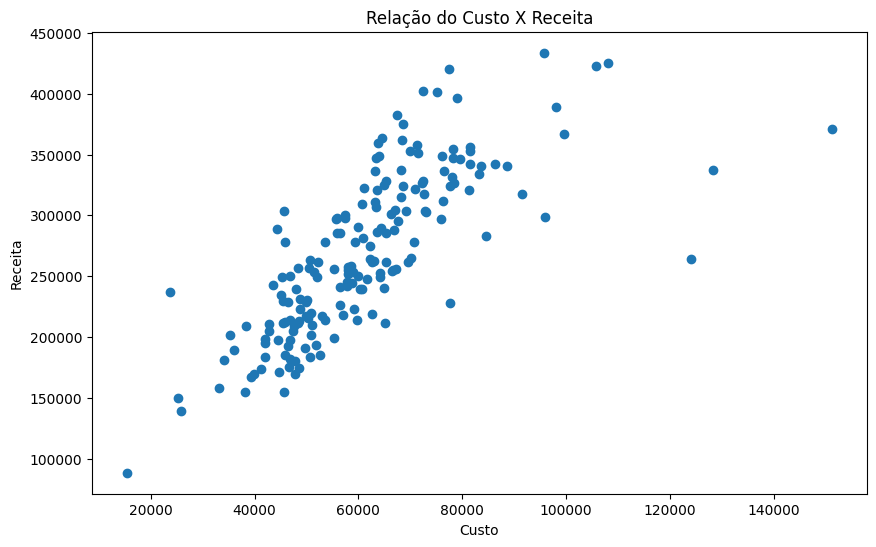

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o")
plt.title("Relação do Custo X Receita")
plt.xlabel("Custo")
plt.ylabel("Receita")
plt.show()

A função np.linspace(0, 1, 175) cria um array unidimensional de 175 elementos que são igualmente espaçados entre 0 e 1.

O primeiro argumento é o valor inicial do intervalo, o segundo argumento é o valor final do intervalo e o terceiro argumento é o número de elementos que serão gerados no intervalo.

Essa função é útil para criar uma sequência de valores que podem ser usados para avaliar uma função em um intervalo específico, por exemplo, para plotar um gráfico ou realizar cálculos numéricos.

In [ ]:
# Criando o modelo a partir da função logística e com os novos valores de x normalizados

p, pcov = curve_fit(funcao, x_new, y_new)

In [ ]:
xarray = np.linspace(0, 1, 175)

In [ ]:
# Estimando a RECEITA do modelo, através do array do numpy.

yarray = np.array([funcao(x, *p) for x in xarray])

In [ ]:
# Voltando para o intervalo original

xarray_new = (xarray * (xmax - xmin)) + xmin
yarray_new = (yarray * (ymax - ymin)) + ymin

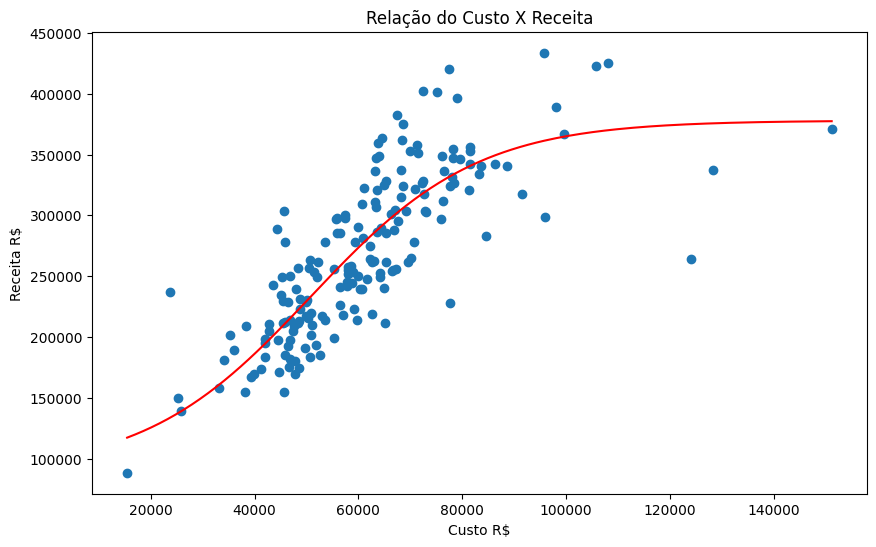

In [ ]:
# Plotando o gráfico predito
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o")
plt.title("Relação do Custo X Receita")
plt.xlabel("Custo R$")
plt.ylabel("Receita R$")
plt.plot(xarray_new, yarray_new, "red")
plt.show()

O produto marginal é a variação do lucro (ou receita) quando há uma mudança incremental no custo de produção. Em outras palavras, é a receita adicional que uma empresa obtém ao aumentar sua produção em uma unidade.

O produto médio, por sua vez, é a receita total dividida pelo número de unidades produzidas. É a média da receita por unidade.

Ao analisar a relação entre o produto marginal e o produto médio, podemos entender o comportamento da produção da empresa. Se o produto marginal é maior que o produto médio, significa que a produção está crescendo e a empresa pode aumentar sua produção para obter mais lucro. Se o produto marginal é menor que o produto médio, significa que a produção está decrescendo e a empresa deve diminuir sua produção para maximizar seu lucro.

O ponto de interseção entre a curva do produto marginal e a curva do produto médio é o ponto em que o produto médio é máximo e a empresa está maximizando seu ROI (retorno sobre o investimento). É importante entender esse ponto para que a empresa possa tomar decisões estratégicas sobre sua produção e investimentos.

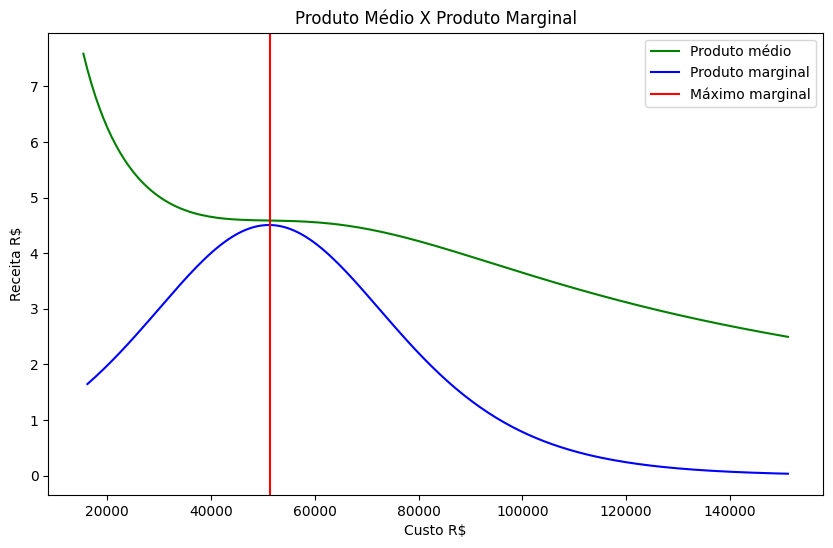

In [ ]:
derivadas = [(yarray_new[1] - yarray_new[0]) / (xarray_new[1] - xarray_new[0])]
for i in range(1, len(yarray_new)):
    derivadas.append((yarray_new[i] - yarray_new[i - 1]) / (xarray_new[i] - xarray_new[i - 1]))
derivadas = np.array(derivadas)

max_derivadas = xarray_new[np.argmax(derivadas)]

plt.figure(figsize=(10, 6))
plt.title("Produto Médio X Produto Marginal")
plt.xlabel("Custo R$")
plt.ylabel("Receita R$")
plt.plot(xarray_new, yarray_new / xarray_new, "green", label="Produto médio") 
plt.plot(xarray_new[1:], derivadas[1:], "blue", label="Produto marginal")
plt.axvline(max_derivadas, color="red", label="Máximo marginal")
plt.legend()
plt.show()


O "máximo médio" é o ponto onde a curva verde (produto médio) atinge seu valor máximo, que nesse caso é em torno de 4.59. Já o "máximo marginal" é o ponto onde a curva azul (produto marginal) atinge seu valor máximo, que nesse caso é em torno de 4.51. Esses valores representam a taxa média de retorno do investimento (no caso do "máximo médio") e a taxa marginal de retorno do investimento (no caso do "máximo marginal"), respectivamente. Em outras palavras, o "máximo médio" representa a taxa de retorno média para cada unidade adicional de investimento, enquanto o "máximo marginal" representa a taxa de retorno adicional obtida com cada unidade adicional de investimento.

In [ ]:
menor = np.argsort(np.absolute((yarray_new / xarray_new) - derivadas))
indice_intersecao_direita = menor[0] if xarray_new[menor[0]] > xarray_new[menor[1]] else menor[1]

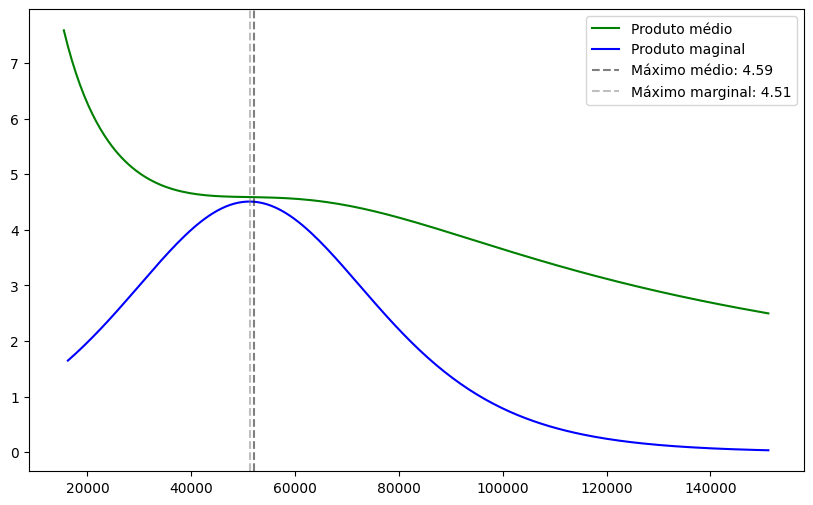

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(xarray_new, yarray_new / xarray_new, "green", label="Produto médio") 
plt.plot(xarray_new[1:], derivadas[1:], "blue", label="Produto maginal")

plt.axvline( # Adiciona uma linha vertical na posição x
    x=xarray_new[indice_intersecao_direita],
    color="black",
    label=f"Máximo médio: {round(yarray_new[indice_intersecao_direita] / xarray_new[indice_intersecao_direita], 2)}",
    linestyle="--",
    alpha=0.5,
)

plt.axvline(
    x=max_derivadas,
    color="grey",
    label=f"Máximo marginal: {round(max(derivadas), 2)}",
    linestyle="--",
    alpha=0.5,
)
plt.legend()

In [ ]:
print(f"Máximo_marginal= R$ {round(max_derivadas, 2)}, Receita= R$ {round(yarray_new[np.argmax(derivadas)], 2)}")
print(f"Máximo_Médio= R$ {round(xarray_new[indice_intersecao_direita], 2)}, Receita= R$ {round(yarray_new[indice_intersecao_direita], 2)}")

Máximo_marginal= R$ 51324.58, Receita= R$ 235454.48
Máximo_Médio= R$ 52104.51, Receita= R$ 238967.28


"Máximo médio" e "máximo marginal" são conceitos econômicos usados em análise de produção.

O "máximo médio" representa o ponto onde a curva do produto médio atinge seu valor máximo. Essa curva representa a relação entre a quantidade média produzida e o custo médio de produção por unidade. Em outras palavras, o "máximo médio" representa o ponto onde a taxa média de retorno do investimento atinge seu valor máximo.

Já o "máximo marginal" representa o ponto onde a curva do produto marginal atinge seu valor máximo. Essa curva representa a taxa de variação da produção em relação a uma unidade adicional de insumo (por exemplo, uma unidade adicional de trabalho ou de capital). Em outras palavras, o "máximo marginal" representa o ponto onde a taxa marginal de retorno do investimento atinge seu valor máximo.

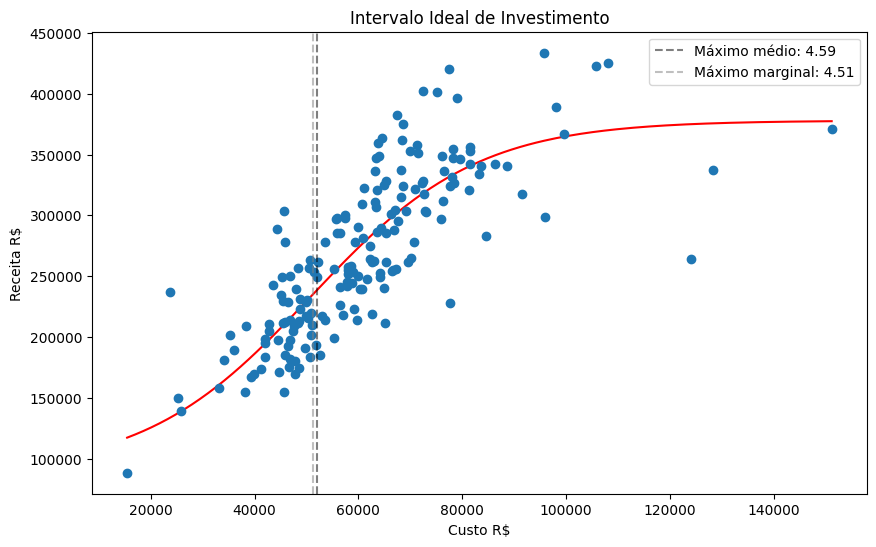

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(xarray_new, yarray_new, "red")
plt.plot(x, y, "o")
plt.xlabel("Custo R$")
plt.ylabel("Receita R$")
plt.title("Intervalo Ideal de Investimento")

plt.axvline( # Adiciona uma linha vertical na posição x
    x=xarray_new[indice_intersecao_direita],
    color="black",
    label=f"Máximo médio: {round(yarray_new[indice_intersecao_direita] / xarray_new[indice_intersecao_direita], 2)}",
    linestyle="--",
    alpha=0.5,
)

plt.axvline(
    x=max_derivadas,
    color="grey",
    label=f"Máximo marginal: {round(max(derivadas), 2)}",
    linestyle="--",
    alpha=0.5,
)
plt.legend()

Em relação ao gráfico do produto médio e produto marginal, é possível observar que o produto médio atinge seu valor máximo no ponto em que a curva de produto marginal cruza sua linha, ou seja, no ponto de interseção entre as duas curvas. Nesse ponto, a empresa está produzindo na quantidade ideal, ou seja, o produto marginal é igual ao produto médio. Além disso, é importante ressaltar que, quando o produto marginal está acima do produto médio, isso indica que a empresa está produzindo abaixo da quantidade ideal e, quando o produto marginal está abaixo do produto médio, indica que a empresa está produzindo acima da quantidade ideal.

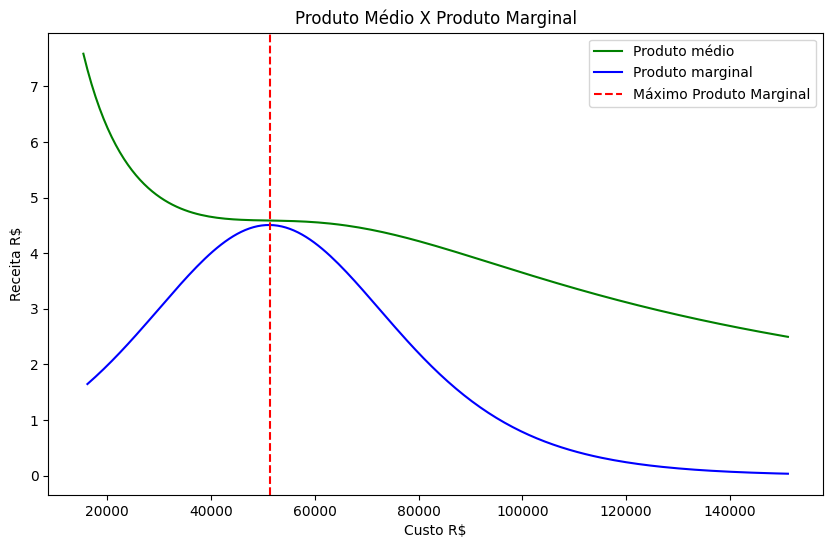

In [ ]:
idx = np.argsort(xarray_new)
x_sorted = xarray_new[idx]
y_sorted = yarray_new[idx]

derivadas = [0]
for i in range(1, len(x_sorted)):
    derivadas.append((y_sorted[i] - y_sorted[i - 1]) / (x_sorted[i] - x_sorted[i - 1]))
derivadas = np.array(derivadas)

max_derivadas = x_sorted[np.argmax(derivadas)]

plt.figure(figsize=(10, 6))
plt.title("Produto Médio X Produto Marginal")
plt.xlabel("Custo R$")
plt.ylabel("Receita R$")
plt.plot(x_sorted, y_sorted / x_sorted, "green", label="Produto médio") 
plt.plot(x_sorted[1:], derivadas[1:], "blue", label="Produto marginal")
plt.axvline(max_derivadas, color='red', linestyle='--', label="Máximo Produto Marginal")
plt.legend()
plt.show()


Objetivos e Motivação da Análise:
Este código tem como objetivo analisar a relação entre os custos, receitas e lucros de uma empresa, com o intuito de identificar possíveis oportunidades de otimização de processos e maximização de lucros.


<ipython-input-23-494fe407d437>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Custo'] = df['Custo'].str.replace('.', '').str.replace(',', '.').astype(float)
<ipython-input-23-494fe407d437>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Receita'] = df['Receita'].str.replace('.', '').str.replace(',', '.').astype(float)


,Custo,Receita,Lucro
0,1544774.0,8836736.0,7291962.0
1,2534082.0,14971323.0,12437241.0
2,2584221.0,13930003.0,11345782.0
3,4562646.0,30348566.0,25785920.0
4,4427242.0,28846946.0,24419704.0
...,...,...,...
176,5064466.0,18375208.0,13310742.0
177,5033214.0,21547485.0,16514271.0
178,8631969.0,34199100.0,25567131.0
179,8149079.0,34223203.0,26074124.0


              Custo       Receita         Lucro
count  1.810000e+02  1.810000e+02  1.810000e+02
mean   6.123578e+06  2.687078e+07  2.074721e+07
std    1.814889e+06  6.632682e+06  5.397182e+06
min    1.544774e+06  8.836736e+06  7.291962e+06
25%    4.852214e+06  2.154748e+07  1.651427e+07
50%    5.997108e+06  2.614236e+07  2.006322e+07
75%    6.947792e+06  3.210913e+07  2.474822e+07
max    1.511558e+07  4.337283e+07  3.430725e+07


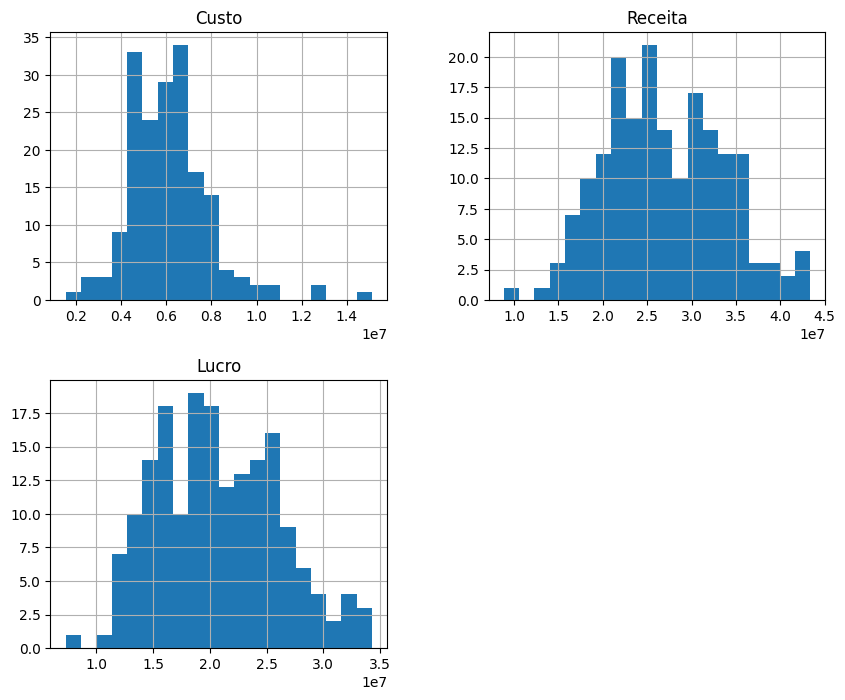

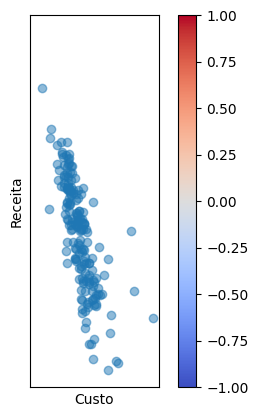

In [ ]:
# Converte as colunas de custo e receita para float
df['Custo'] = df['Custo'].str.replace('.', '').str.replace(',', '.').astype(float)
df['Receita'] = df['Receita'].str.replace('.', '').str.replace(',', '.').astype(float)

# Cria uma nova coluna com a diferença entre receita e custo
df['Lucro'] = df['Receita'] - df['Custo']
display(df)

# Analisa a distribuição das variáveis
print(df.describe())

# Plota o histograma das variáveis
df.hist(bins=20, figsize=(10, 8))

# Plota a matriz de correlação
corr = df.corr()
plt.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Plota o gráfico de dispersão entre custo e receita
plt.scatter(df['Custo'], df['Receita'], alpha=0.5)
plt.xlabel('Custo')
plt.ylabel('Receita')
plt.show()

